In [1]:
import astropixel
from astropixel import catalog_querry
from astropixel import make_star
from astropixel import plot_stars

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
#import catalog_querry
#import cutout
#import plot_stars
#import make_star


In [3]:

coord = SkyCoord.from_name('Barnard\'s Star')
radius = 1*u.arcmin
#field = StarPlotter(coord, size=(50, 50), radius=1*u.arcmin)
catalog_querry.get_sdss_catalog(coord=coord, radius=radius)

RA_ICRS,DE_ICRS,mode,q_mode,class,SDSS12,m_SDSS12,_tab1_18,Q,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,zsp,zph,e_zph,__zph_
deg,deg,,,,,,yr,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,
float64,float64,uint8,str1,uint8,str19,str1,float64,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float32
269.445596,4.680012,1,+,6,J175746.94+044048.0,*,2003.6391,1,20.004,0.043,17.970,0.006,17.146,0.005,16.843,0.005,16.682,0.010,--,--,--,--
269.446191,4.677932,1,+,6,J175747.08+044040.5,*,2003.6391,1,21.095,0.095,19.860,0.018,19.310,0.015,19.012,0.016,18.933,0.052,--,--,--,--
269.445764,4.679167,1,,6,J175746.98+044045.0,,2003.6391,1,23.128,0.533,20.542,0.029,19.553,0.019,19.291,0.020,19.125,0.060,--,--,--,--
269.448015,4.683318,1,+,6,J175747.52+044059.9,*,2003.6391,1,18.591,0.018,17.086,0.004,16.475,0.004,16.235,0.004,16.118,0.008,--,--,--,--
269.449395,4.684532,1,+,6,J175747.85+044104.3,*,2003.6391,1,20.134,0.046,18.574,0.008,18.002,0.007,17.786,0.008,17.718,0.020,--,--,--,--
269.450722,4.682767,1,+,6,J175748.17+044057.9,*,2003.6391,1,22.808,0.382,20.278,0.023,19.525,0.018,19.175,0.018,18.959,0.052,--,--,--,--
269.452434,4.682348,1,+,6,J175748.58+044056.4,,2003.6391,1,23.494,0.658,20.731,0.031,19.997,0.024,19.681,0.026,19.515,0.083,--,--,--,--
269.449619,4.682260,1,,6,J175747.90+044056.1,,2003.6391,1,24.929,0.963,24.734,0.663,23.600,0.495,22.422,0.272,19.252,0.066,--,--,--,--


In [4]:
plotter = plot_stars.StarPlotter(coord, size=(50, 50), radius=1*u.arcmin)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.3706188121184724e-05..1.1026433891720833].


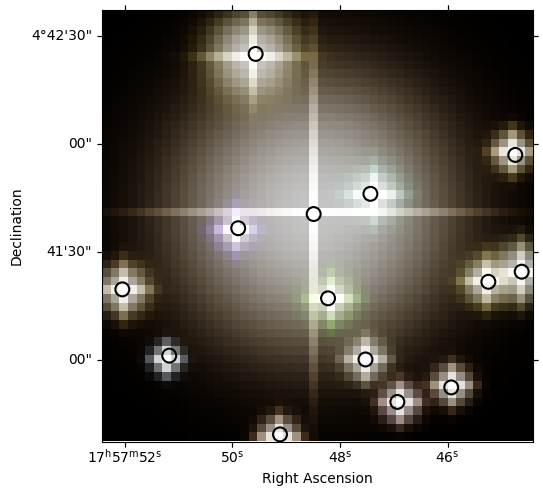

In [5]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(121, projection=plotter.wcs)
plotter.plot_cross_psf_field_rgb(ax=ax1, labels=True)
ax1.scatter(plotter.cat['RAJ2000'], plotter.cat['DEJ2000'], transform=ax1.get_transform('world'), s=100, edgecolor='black', facecolor='none', lw=1.5)
#plotter.plot_scatter_field(ax=ax1, labels=True)
#ax2 = fig.add_subplot(122, projection=plotter.wcs)
#ax2 = plotter.plot_cross_psf_field_rgb(ax=ax2, labels=True)

plt.tight_layout()

In [6]:
size = (300, 200)
x = np.linspace(0, size[0]-1, size[0])
y = np.linspace(0, size[1]-1, size[1])
x, y = np.meshgrid(x, y)


In [7]:
psf = make_star.GaussianCrossPSF(amplitude=1)
x_center = 150
y_center = 100
stddev = 10
background_factor = 0.1
size = (300, 200)
psf_cross = psf.generate_cross_psf(x_center, y_center, stddev, background_factor, size=size)

In [8]:
psf_cross.shape

(200, 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.31856912332963e-12..1.0963471261421498].


<WCSAxes: >

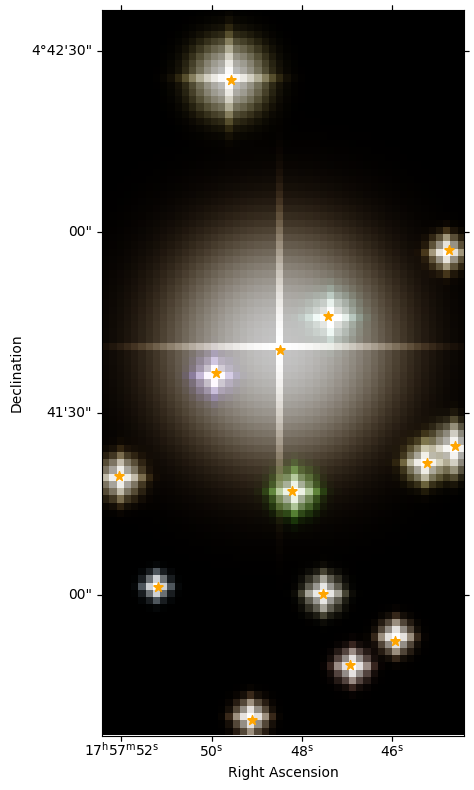

In [17]:
plotter1 = plot_stars.StarPlotter(coord, size=(50, 100), radius=1*u.arcmin)
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(121, projection=plotter1.wcs)
plotter1.plot_cross_psf_field_rgb(ax=ax1, labels=True)
plotter1.plot_scatter_field(ax=ax1, labels=True)
#ax1.scatter(plotter1.cat['RAJ2000'], plotter1.cat['DEJ2000'], transform=ax1.get_transform('world'), s=100, edgecolor='pink', facecolor='none', lw=1.5)
#plt.show()
